# Model 2  - f1 score of 62% for the test set, which is better than Model 1 f1 score of 52%.  Therefore, this is the better model.  However, I would continue to tune to achieve a higher f1 score.
This model will incorporate the following:

-perform a chi-square test to select the top 4 features (Model 1 selected the top 2 features)
-use of n_Neighbors=3, weights='distance'  (Model 1 used n_Neighbors=1, weights='uniform')

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pylab as plt
%matplotlib inline 

from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score, recall_score, f1_score

In [2]:
dfDiabetes = pd.read_csv('diabetes.csv', na_values='?')
dfDiabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
type(dfDiabetes)

pandas.core.frame.DataFrame

In [4]:
dfDiabetes.to_numpy()

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [5]:
type(dfDiabetes)

pandas.core.frame.DataFrame

In [6]:
print(dfDiabetes.shape)
dfDiabetes.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
type(dfDiabetes)

pandas.core.frame.DataFrame

In [8]:
X = dfDiabetes.drop("Outcome",axis=1)   #Feature Matrix
Y = dfDiabetes["Outcome"]          #Target Variable
dfDiabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
dfDiabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [10]:
random_state =  np.random.RandomState(42)

In [11]:
print(X.shape)
print(type(X))

(768, 8)
<class 'pandas.core.frame.DataFrame'>


In [12]:
print(Y.shape)
print(type(Y))

(768,)
<class 'pandas.core.series.Series'>


In [13]:
dfDiabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
dfDiabetes.isnull().sum().sum()

0

In [15]:
#defining your random data set to stay the same every time ran
random_state =  np.random.RandomState(42)

In [16]:
print(X.shape)
print(type(X))

(768, 8)
<class 'pandas.core.frame.DataFrame'>


In [17]:
X = dfDiabetes.iloc[:, 0:8].values # .values converts the DataFrame into the NumPy representation

In [18]:
print(X.shape)
print(type(X))

(768, 8)
<class 'numpy.ndarray'>


In [19]:
Y = dfDiabetes.iloc[:, 8].values

In [20]:
print(Y.shape)
print(type(Y))

(768,)
<class 'numpy.ndarray'>


In [21]:
#if you also wanted a validation set of 20%

X_train, X_test_tmp, Y_train, Y_test_tmp = train_test_split(X, Y, test_size=0.4, random_state=random_state)
X_val, X_test, Y_val, Y_test = train_test_split(X_test_tmp, Y_test_tmp, test_size=0.5, random_state=random_state)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)
print(X_val.shape, Y_val.shape)

(460, 8) (460,)
(154, 8) (154,)
(154, 8) (154,)


In [22]:
# check class balance in the training set
unique_elements, counts_elements = np.unique(Y_train, return_counts=True)
print(unique_elements)
print(counts_elements)

[0 1]
[294 166]


In [23]:
# check class distribution - test set
unique_elements, counts_elements = np.unique(Y_test, return_counts=True)
print(unique_elements)
print(counts_elements)

[0 1]
[101  53]


In [24]:
# check class distribution - validation set
unique_elements, counts_elements = np.unique(Y_val, return_counts=True)
print(unique_elements)
print(counts_elements)

[0 1]
[105  49]


In [25]:
from sklearn.feature_selection import SelectKBest, chi2

In [26]:
ch2 = SelectKBest(chi2, k=4) # perform a chi-square test to select the top 4 features 
X_train = ch2.fit_transform(X_train, Y_train)
X_test = ch2.transform(X_test)

In [27]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(460, 4)
(154, 4)
(154, 8)


In [28]:
cols = ch2.get_support(indices=True)
dfDiabetes.iloc[:,cols].columns

Index(['Glucose', 'Insulin', 'BMI', 'Age'], dtype='object')

In [30]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [31]:
from sklearn.neighbors import KNeighborsClassifier

#Model 2: n_Neighbors=3, weights='distance'

knn = KNeighborsClassifier(n_neighbors=3, weights='distance') # initialize a KNN classifier
knn.fit(X_train, Y_train) # train classifer with training set

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [34]:
Y_train_predicted = knn.predict(X_train) # note that we are predicting the outcome for the training set

In [35]:
print("Training Classification accuracy:", knn.score(X_train, Y_train))
print("\n")
print ("Training Confusion matrix: \n" + str(confusion_matrix(Y_train, Y_train_predicted)))
print("\n")
print("Training Classification Report:\n",classification_report(Y_train, Y_train_predicted))

Training Classification accuracy: 1.0


Training Confusion matrix: 
[[294   0]
 [  0 166]]


Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       294
           1       1.00      1.00      1.00       166

    accuracy                           1.00       460
   macro avg       1.00      1.00      1.00       460
weighted avg       1.00      1.00      1.00       460



In [36]:
#predicting the outcome for the test set
Y_test_predicted = knn.predict(X_test)
conf_matrix_knn = confusion_matrix(Y_test, Y_test_predicted)
print('************K-NEAREST NEIGHBOR************')
print("Test Classification accuracy:", knn.score(X_test,Y_test))
print("\n")
print ("Test Confusion matrix: \n" + str(conf_matrix_knn))
print("\n")
print("Test Classification Report:\n",classification_report(Y_test, Y_test_predicted))

************K-NEAREST NEIGHBOR************
Test Classification accuracy: 0.7272727272727273


Test Confusion matrix: 
[[78 23]
 [19 34]]


Test Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.77      0.79       101
           1       0.60      0.64      0.62        53

    accuracy                           0.73       154
   macro avg       0.70      0.71      0.70       154
weighted avg       0.73      0.73      0.73       154



In [43]:
from sklearn.metrics import plot_confusion_matrix

[[78 23]
 [19 34]]


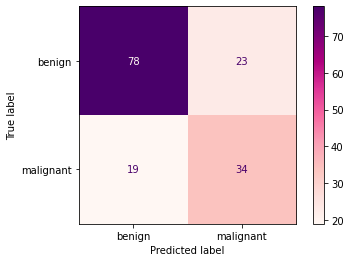

In [44]:
disp = plot_confusion_matrix(knn, X_test, Y_test,
                                 display_labels=['benign','malignant'],
                                 cmap=plt.cm.RdPu,
                                 normalize=None)
print(disp.confusion_matrix)

In [39]:
from sklearn.metrics import plot_roc_curve, roc_auc_score

Area under the ROC: 0.7599476928824959


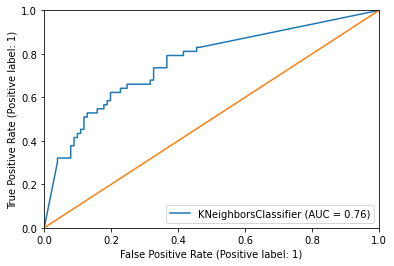

In [40]:
viz = plot_roc_curve(knn, X_test, Y_test)
print('Area under the ROC:', viz.roc_auc)   
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.0])
plt.show();

In [41]:
df_knn = pd.DataFrame(columns= ['neighbors','weight', 'accuracy', 'F1', 'ROC_area'])

for neighbor_count in range (1,6):
    for weight_metric in ['uniform', 'distance']:    
        knn_ht = KNeighborsClassifier(n_neighbors=neighbor_count, weights=weight_metric) # initialize a KNN classifier
        knn_ht.fit(X_train, Y_train)

        Y_pred_prob_ht = knn_ht.predict_proba(X_test)[:, 1]
       
        accuracy = knn_ht.score(X_test,Y_test)
        f1 = f1_score(Y_test,knn_ht.predict(X_test),average='weighted')
        roc = roc_auc_score(Y_test, Y_pred_prob_ht)       
        
        dict_values = {'neighbors': neighbor_count, 'weight': weight_metric,'accuracy':accuracy,'F1' : f1, 'ROC_area':roc}
        row_to_add = pd.Series(dict_values)
        
        df_knn = df_knn.append(row_to_add, ignore_index=True)

df_knn.set_index(['neighbors','weight'], inplace=True)
df_knn

accuracy        F1  ROC_area
neighbors weight                                
1         uniform   0.688312  0.688312  0.654773
          distance  0.688312  0.688312  0.654773
2         uniform   0.733766  0.710486  0.727162
          distance  0.688312  0.688312  0.732393
3         uniform   0.720779  0.723525  0.756211
          distance  0.727273  0.729477  0.759948
4         uniform   0.746753  0.732396  0.763777
          distance  0.720779  0.720137  0.771530
5         uniform   0.720779  0.720137  0.775640
          distance  0.727273  0.727273  0.780123

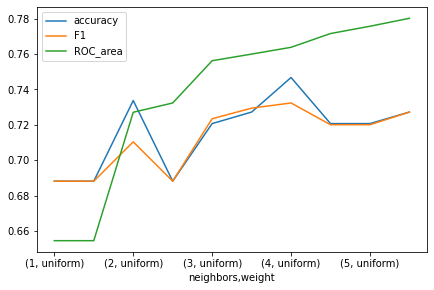

In [42]:
df_knn.plot(figsize = (7,4.5));